## Exploratory Data Analysis and Data Visualization

In this Jupyter Notebook I  want to take a closer look at relationship between targets and predictors of the classification model. There are  two separate sections: 
1. General Section - here is where I have imported python libraries and made a series of functions that I will be using throughout the notebook for data visualization
2. EDA Section - here looking at the relationship between predictors that are helping the classification models determining if a company committed to netzero

### General Section - Import and Functions for Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Function for histogram 
def plot_hist(series, title, bins):
    plt.figure(figsize=(10,6))
    plt.hist(series, color='skyblue', bins=bins)
    plt.axvline(series.median(), color = 'orange', lw=2)
    plt.xlabel(f'{title}', fontdict= {'fontsize':14})
    plt.ylabel('Frequency', fontdict= {'fontsize':14})
    plt.title(f'Distribution Of {title} In MSCI ACWI World Index', fontdict = {'fontsize':15})
    plt.tight_layout()

In [3]:
#Function for barh
def plot_barh(x,y, title):
    plt.figure(figsize=(10,8))
    plt.barh(x,y, color='skyblue')
    plt.xlabel(f'{title}', fontdict= {'fontsize':14})
    plt.title(f'{title} In MSCI ACWI World Index', fontdict = {'fontsize':15})
    plt.tight_layout()
    

In [4]:
#ScatterPlot Function
def plot_stp(data, y, x, title, upper_range):
    plt.figure(figsize=(12,6))
    ax = plt.subplot()
    ax = sns.boxplot(y=y, x=x,  
                     data=data, palette="ocean", linewidth=2, orient='h', 
                     medianprops=dict(color="orange", alpha=1), )
    ax.set_ylabel('NetZero Commitment', fontdict= {'fontsize':14})
    ax.set_xlabel(f'{title}', fontdict= {'fontsize':14})
    ax.set_yticklabels(['No', 'Yes'], fontdict= {'fontsize':12})
    ax.set_title(f'Distribution of {title}\n', fontdict = {'fontsize':16})
    plt.xlim(0,int(f'{upper_range}'))
    plt.tight_layout();

In [5]:
#Distribution for companies that did/ did not commit to netzero
def plot_barh_commitment(df, title, x_label):
    plt.figure(figsize=(10,8))
    y = df.index
    x1 = df['No'].values
    x2 = df['Yes'].values
    b1 = plt.barh(y, x1, color='orange', alpha=0.8)
    b2 = plt.barh(y, x2, left=x1, color='skyblue', alpha=0.8)
    plt.xlabel(f'{x_label}', fontdict= {'fontsize':13})
    plt.title(f'{title}', fontdict = {'fontsize':14})
    plt.legend([b1,b2], ['No Commitment', 'Committed To NetZero',])
    plt.tight_layout()

### Section 2 - EDA On NetZero Committment

In [6]:
#importing and cleaning my df for EDA & Data Vis
df = pd.read_csv('../data/output/msci_company_country.csv')
df = df[df['net_zero_committed']!= 'not_taking_action'].copy()
df = df.drop(columns=['all_emission', 'scope_1_tonnes', 'scope_2_tonnes'])
#dropping the duplicates companies
df['t_date'] = pd.to_datetime(df['t_date'])
df['year'] = df['t_date'].dt.year
df['month'] = df['t_date'].dt.month
df = df.sort_values(by=["fsym_id", "year", 'month'])
df = df.drop_duplicates(subset=["fsym_id"], keep='last')

**Step 1** DataSet Exploration: looking at number of companies, and their distribution by countries and region.  

1. number of companies 
2. number of companies by countries 
3. number of companies by region
4. number of companies by country economy

In [7]:
#Looking at 538 companies
len(df['fsym_id'].unique())

535

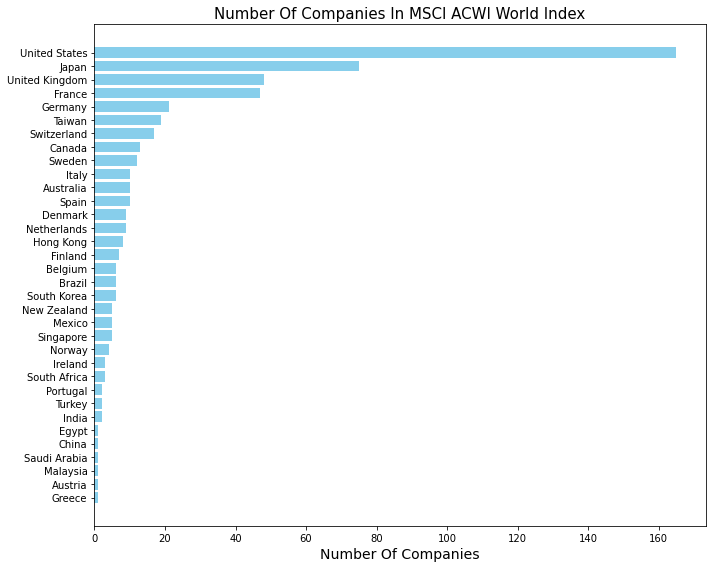

In [8]:
#Looking at number of companies by country in descending order
state = df.groupby('Entity').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(state['Entity'], state['fsym_id'], 'Number Of Companies')

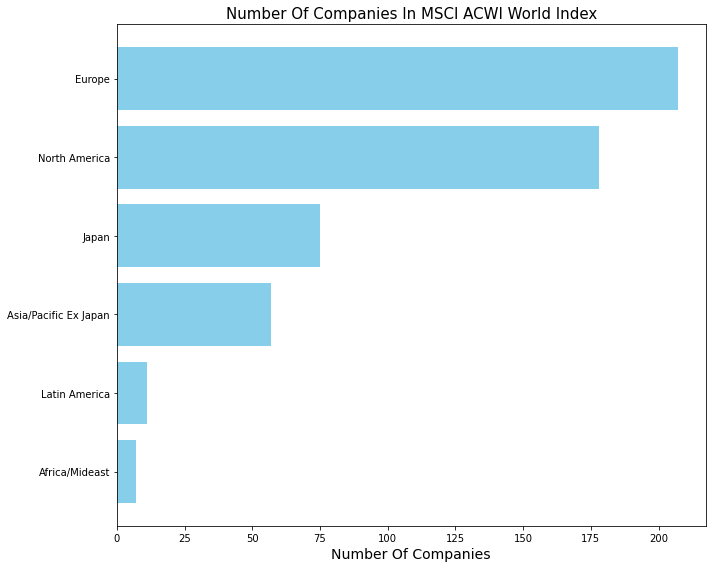

In [9]:
#Looking at number of companies by region in descending order
region = df.groupby('region').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(region['region'], region['fsym_id'], 'Number Of Companies')

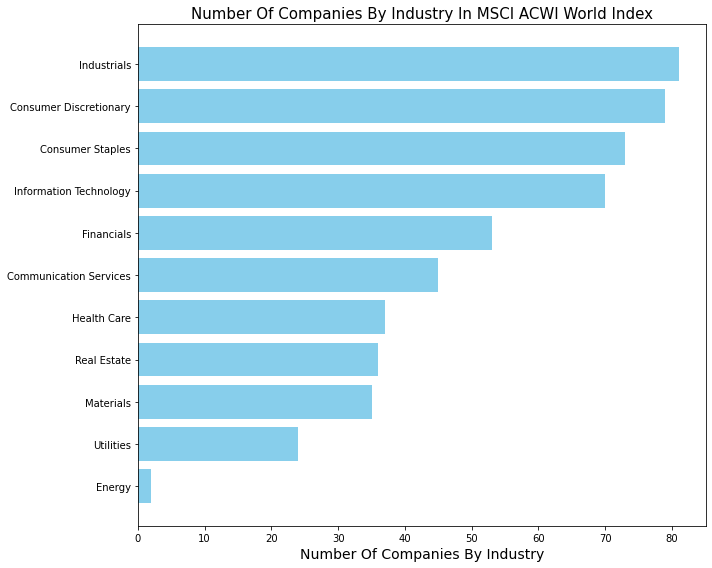

In [10]:
#looking number of companies by industry
industry = df.groupby('gics_sector_name').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(industry['gics_sector_name'], industry['fsym_id'], 'Number Of Companies By Industry')

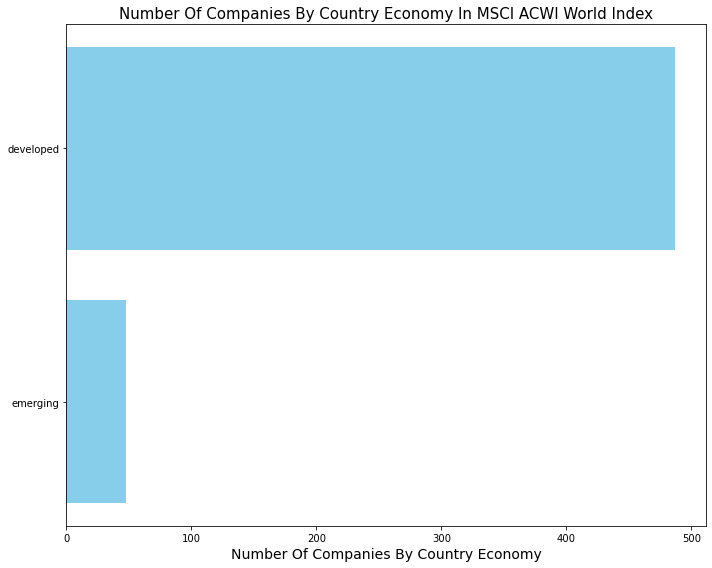

In [11]:
country_economy = df.groupby('country_economy').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(country_economy['country_economy'], country_economy['fsym_id'], 'Number Of Companies By Country Economy')

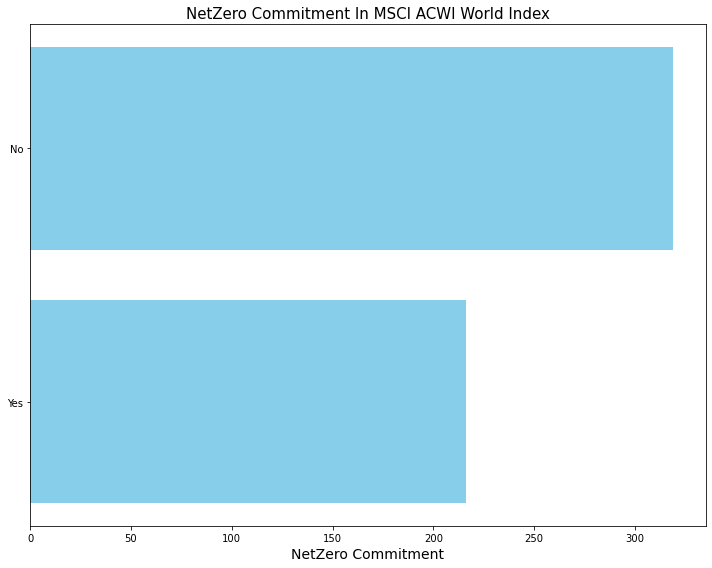

In [12]:
netzero_company = df.groupby('net_zero_committed').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(netzero_company['net_zero_committed'], netzero_company['fsym_id'], 'NetZero Commitment')

**Step 2** Looking at number of companies and then likelihood that companies committed to NetZero based on the metrics that I will be using in my classification problem; NetZero Commitment by:

1. Region
2. Sector
3. Market Capitalization
4. Country Economy
5. Climate Target
6. Scope 1& 2 and Scope 3 Emissions

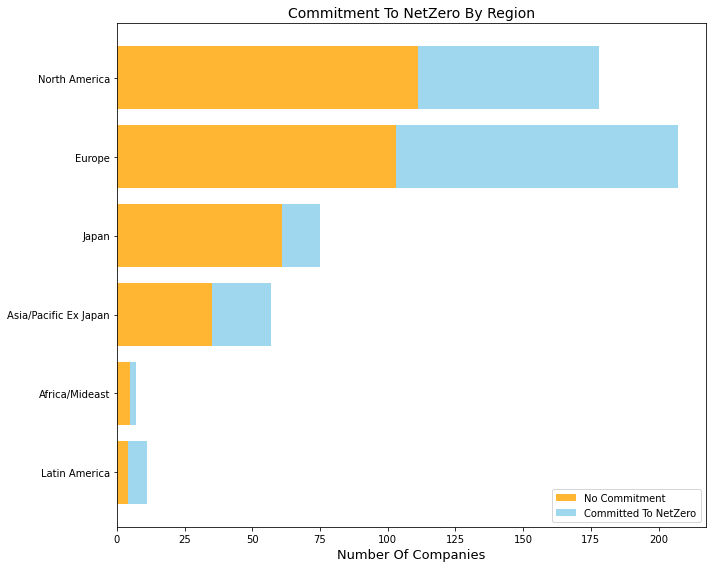

In [13]:
#NetZero Commitment By Region - Number of Companies
netzero_company_region = df.groupby(['region',
                                     'net_zero_committed']).count()['fsym_id'].sort_values(ascending=True).reset_index()
netzero_company_region_p =  pd.pivot(netzero_company_region, values='fsym_id',  
                                     columns='net_zero_committed', index='region').sort_values(by='No', ascending=True)

plot_barh_commitment(netzero_company_region_p, 'Commitment To NetZero By Region', 'Number Of Companies')

In [14]:
#NetZero Commitment By Region - Likelihood
pd.DataFrame(df.groupby(['region'])['net_zero_committed'].value_counts(normalize=True))

net_zero_committed
region                net_zero_committed                    
Africa/Mideast        No                            0.714286
                      Yes                           0.285714
Asia/Pacific Ex Japan No                            0.614035
                      Yes                           0.385965
Europe                Yes                           0.502415
                      No                            0.497585
Japan                 No                            0.813333
                      Yes                           0.186667
Latin America         Yes                           0.636364
                      No                            0.363636
North America         No                            0.623596
                      Yes                           0.376404

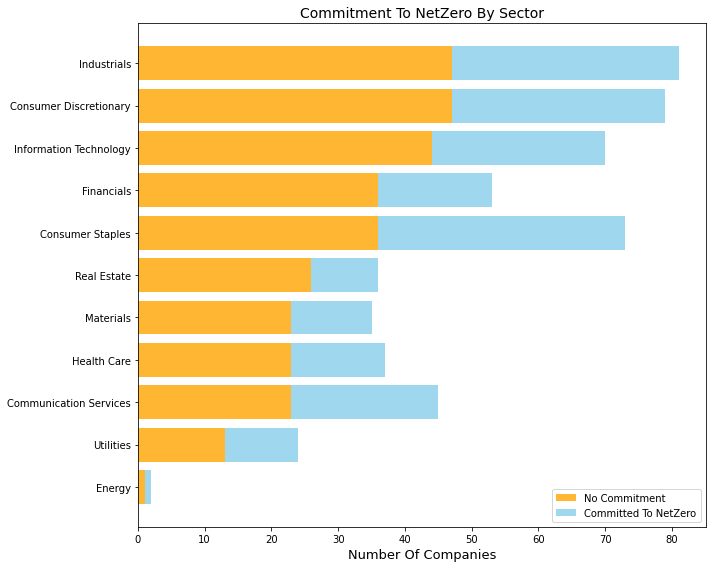

In [15]:
#NetZero Commitment By Industry - number of companies
netzero_company_region = df.groupby(['gics_sector_name','net_zero_committed']).count()['fsym_id'].sort_values(ascending=True).reset_index()
netzero_company_region_p =  pd.pivot(netzero_company_region, values='fsym_id',  
                                     columns='net_zero_committed', index='gics_sector_name').sort_values(by='No', ascending=True)
plot_barh_commitment(netzero_company_region_p,'Commitment To NetZero By Sector', 'Number Of Companies')

In [16]:
#NetZero Commitment By Sector - Likelihood
pd.DataFrame(df.groupby(['gics_sector_name'])['net_zero_committed'].value_counts(normalize=True))

net_zero_committed
gics_sector_name       net_zero_committed                    
Communication Services No                            0.511111
                       Yes                           0.488889
Consumer Discretionary No                            0.594937
                       Yes                           0.405063
Consumer Staples       Yes                           0.506849
                       No                            0.493151
Energy                 No                            0.500000
                       Yes                           0.500000
Financials             No                            0.679245
                       Yes                           0.320755
Health Care            No                            0.621622
                       Yes                           0.378378
Industrials            No                            0.580247
                       Yes                           0.419753
Information Technology No                            0.628571
                       Yes                           0.371429
Materials              No                            0.657143
                       Yes                           0.342857
Real Estate            No                            0.722222
                       Yes                           0.277778
Utilities              No                            0.541667
                       Yes                           0.458333

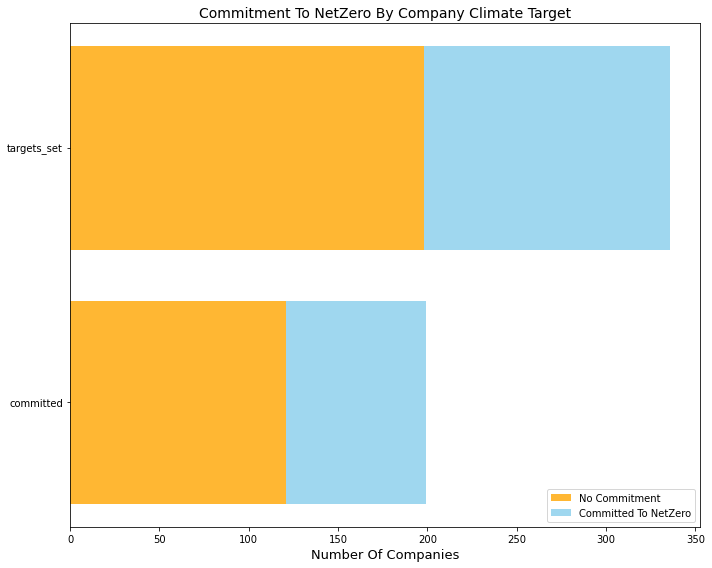

In [17]:
#NetZero Commitment By Climate Target
netzero_company_region = df.groupby(['target_status_class_year','net_zero_committed']).count()['fsym_id'].sort_values(ascending=True).reset_index()
netzero_company_region_p =  pd.pivot(netzero_company_region, values='fsym_id',  
                                     columns='net_zero_committed', index='target_status_class_year').sort_values(by='No', ascending=True)

plot_barh_commitment(netzero_company_region_p,'Commitment To NetZero By Company Climate Target', 'Number Of Companies')

In [18]:
#NetZero Commitment By Climate Target - Likelihood
pd.DataFrame(df.groupby(['target_status_class_year'])['net_zero_committed'].value_counts(normalize=True))

net_zero_committed
target_status_class_year net_zero_committed                    
committed                No                            0.608040
                         Yes                           0.391960
targets_set              No                            0.589286
                         Yes                           0.410714

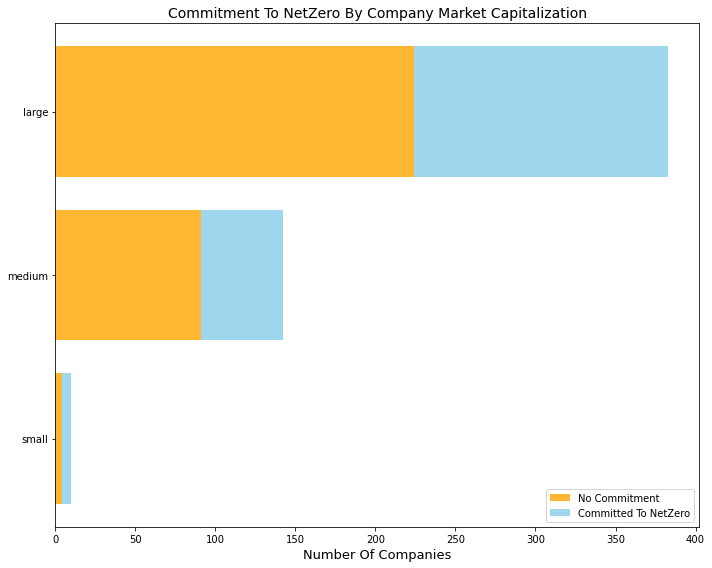

In [19]:
#NetZero Commitment By Company Market Capitalization
netzero_company_cap = df.groupby(['company_cap','net_zero_committed']).count()['fsym_id'].sort_values(ascending=True).reset_index()
netzero_company_cap_p =  pd.pivot(netzero_company_cap, values='fsym_id',  
                                     columns='net_zero_committed', index='company_cap').sort_values(by='No', ascending=True)

plot_barh_commitment(netzero_company_cap_p,'Commitment To NetZero By Company Market Capitalization', 
                     'Number Of Companies')

In [20]:
#NetZero Commitment By Climate Target - Likelihood
pd.DataFrame(df.groupby(['company_cap'])['net_zero_committed'].value_counts(normalize=True))

net_zero_committed
company_cap net_zero_committed                    
large       No                            0.584856
            Yes                           0.415144
medium      No                            0.640845
            Yes                           0.359155
small       Yes                           0.600000
            No                            0.400000

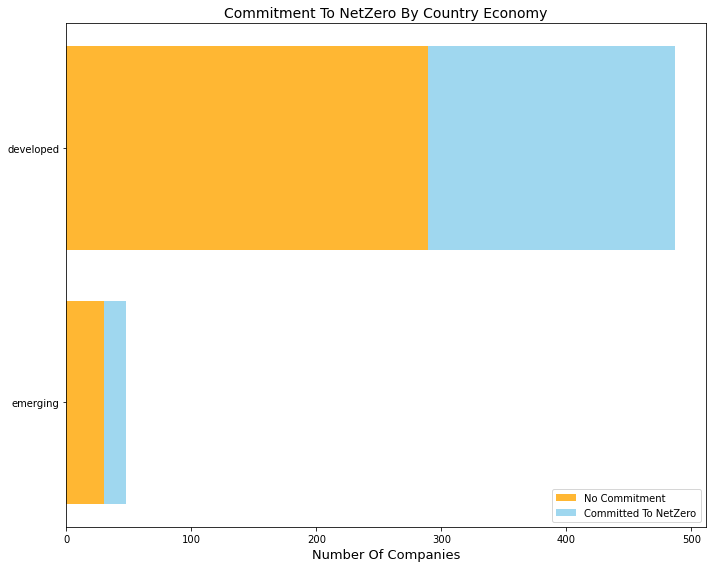

In [21]:
#NetZero Commitment By Country Economy
netzero_country_economy = df.groupby(['country_economy','net_zero_committed']).count()['fsym_id'].sort_values(ascending=True).reset_index()
netzero_country_economy_p =  pd.pivot(netzero_country_economy , values='fsym_id',  
                                     columns='net_zero_committed', index='country_economy').sort_values(by='No', ascending=True)

plot_barh_commitment(netzero_country_economy_p,'Commitment To NetZero By Country Economy', 
                     'Number Of Companies')

In [22]:
#NetZero Commitment By Climate Target - Likelihood
pd.DataFrame(df.groupby(['country_economy'])['net_zero_committed'].value_counts(normalize=True))

net_zero_committed
country_economy net_zero_committed                    
developed       No                            0.593429
                Yes                           0.406571
emerging        No                            0.625000
                Yes                           0.375000

**Step 3** DataSet Exploration: looking at emission distribution In relation to NetZero Commitment 

1. Distribution of Scope 1&2 and Scope 3 Emissions
2. Distribution of Scope 1&2 and Scope 3 Emissions, by NetZero Commitment

Side Note: to have a better and more reliable understanding of the distribution of carbon emissions, I need all the historical observations of company carbon emissions. Thus I need to reimport the original df


In [23]:
# df = pd.read_csv('../data/output/msci_company_country.csv')
# df = df[df['net_zero_committed']!= 'not_taking_action'].copy()
# df = df.drop(columns=['all_emission', 'scope_1_tonnes', 'scope_2_tonnes'])

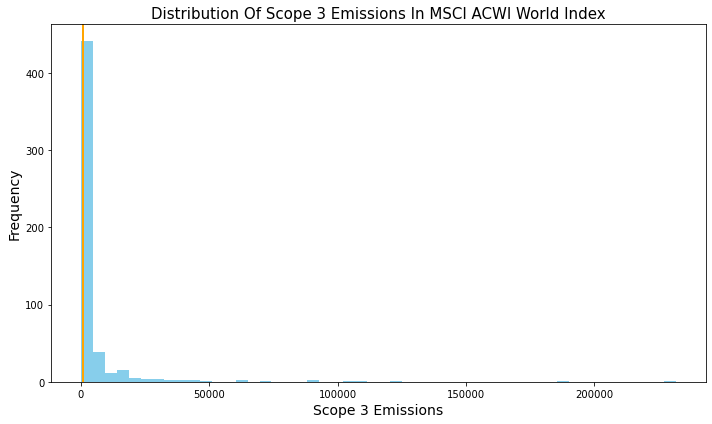

In [24]:
plot_hist(df['scope_3_tonnes'], 'Scope 3 Emissions', 50)

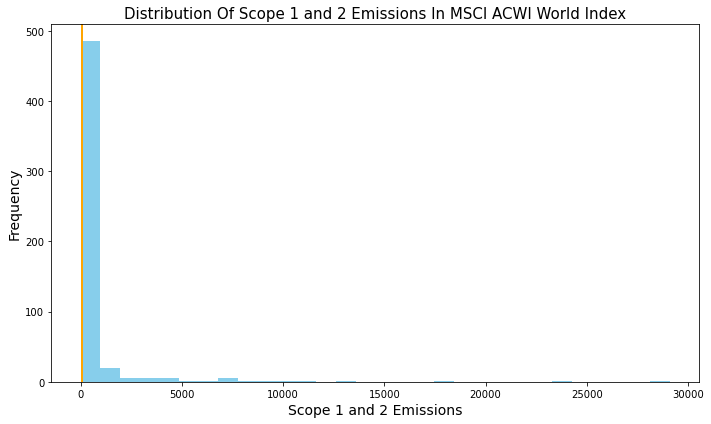

In [25]:
plot_hist(df['scope1_2_emission'], 'Scope 1 and 2 Emissions',30)

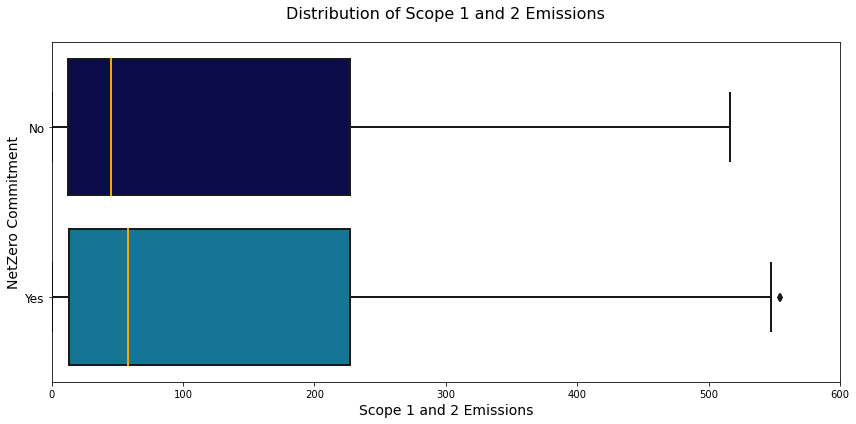

In [69]:
plot_stp(df, 'net_zero_committed', 'scope1_2_emission', 'Scope 1 and 2 Emissions', 600)

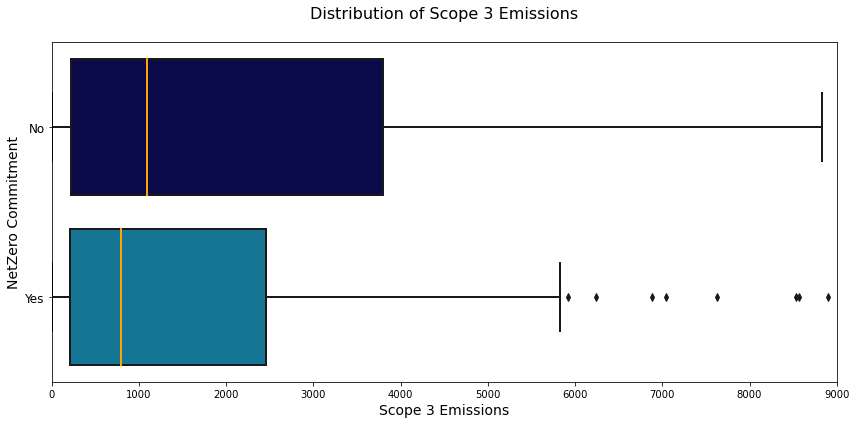

In [75]:
plot_stp(df, 'net_zero_committed', 'scope_3_tonnes', 'Scope 3 Emissions',9000)

In [76]:
df.groupby('net_zero_committed').describe()[['scope_3_tonnes', 'scope1_2_emission']].T

net_zero_committed                  No           Yes
scope_3_tonnes    count     319.000000    216.000000
                  mean     5149.575905   5411.868329
                  std     21096.978089  11796.481669
                  min         5.026250      1.584500
                  25%       209.999297    225.521996
                  50%       798.830500   1095.381000
                  75%      2460.282750   3801.504672
                  max    231868.660500  90312.404750
scope1_2_emission count     319.000000    216.000000
                  mean      424.210017    819.493328
                  std      1671.307706   2905.465975
                  min         0.072000      0.074500
                  25%        13.155125     12.596109
                  50%        57.832250     45.061706
                  75%       226.845875    227.027287
                  max     23655.942500  29104.578500

**Step 4**  Lastly I'd like to show the distribution of emission at teh region level. The goal is to understand whether in all regions companies taht commit to NetZero are the ones with greater level of emissions.

**Europe**

In [29]:
europe = df[df['region']=='Europe']

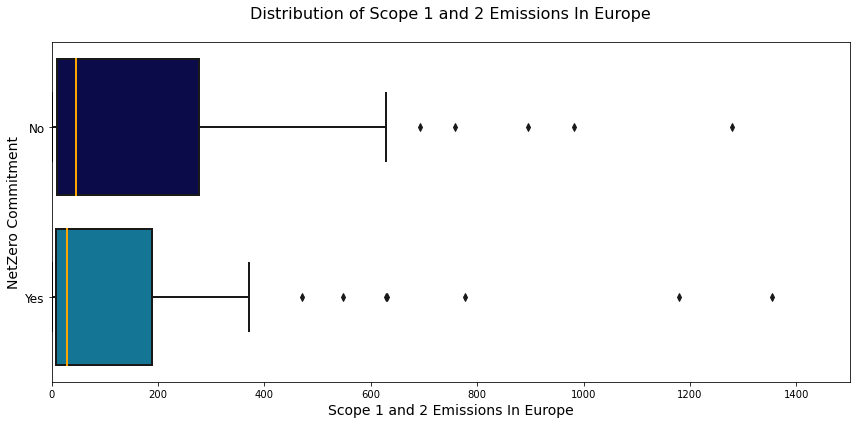

In [30]:
plot_stp(europe, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Europe', 1500)

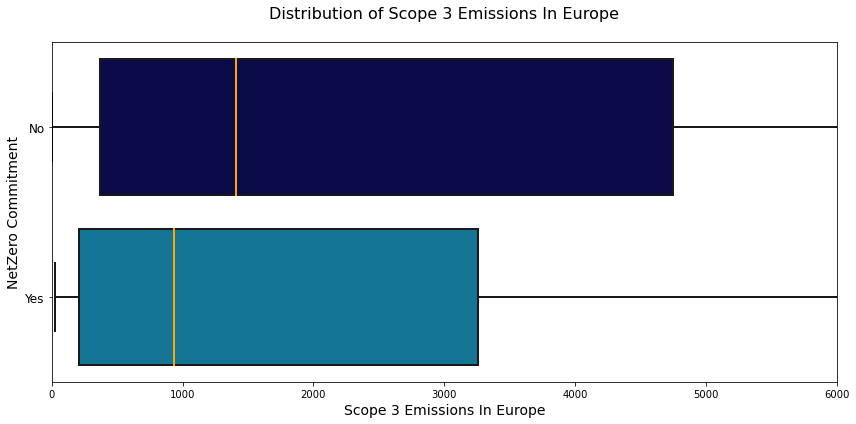

In [31]:
plot_stp(europe, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In Europe', 6000)

**North America**

In [34]:
north_america = df[df['region']=='North America']

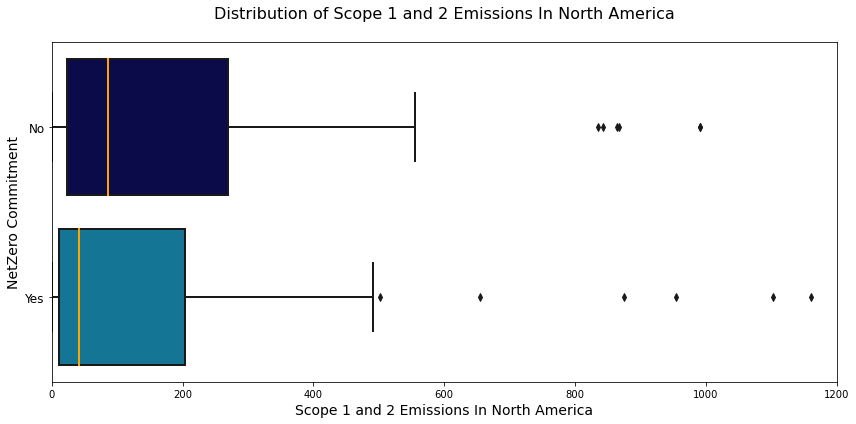

In [35]:
plot_stp(north_america, 'net_zero_committed', 'scope1_2_emission',
         'Scope 1 and 2 Emissions In North America', 1200)

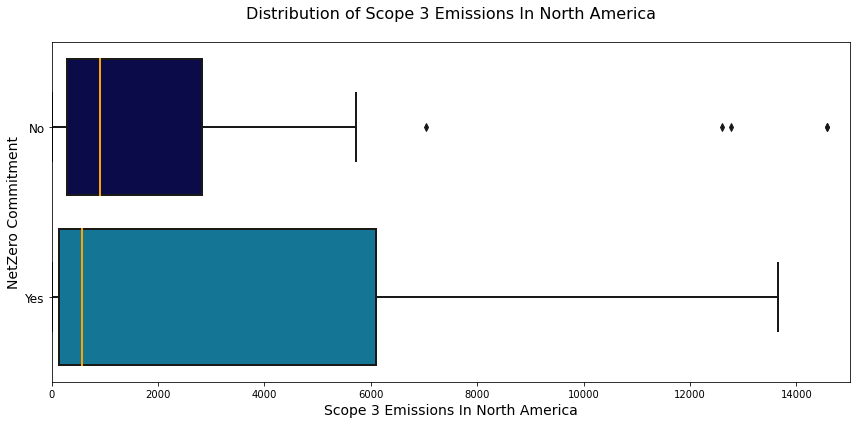

In [56]:
plot_stp(north_america, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In North America', 15000)

**Japan**

In [37]:
japan = df[df['region']=='Japan']

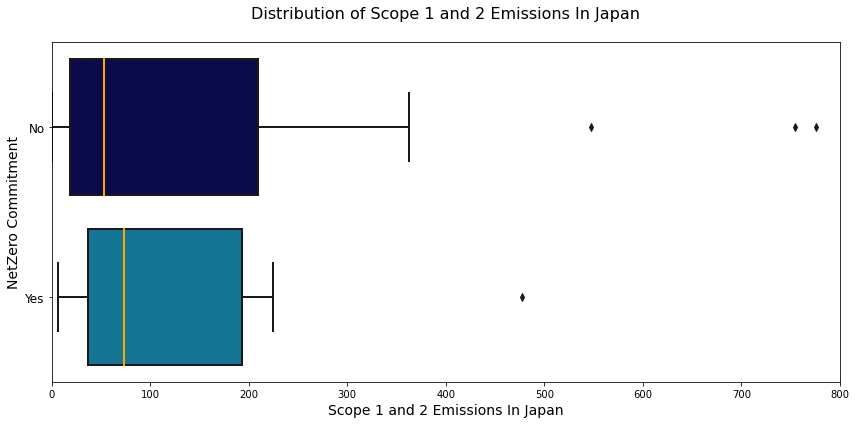

In [38]:
plot_stp(japan, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Japan', 800)

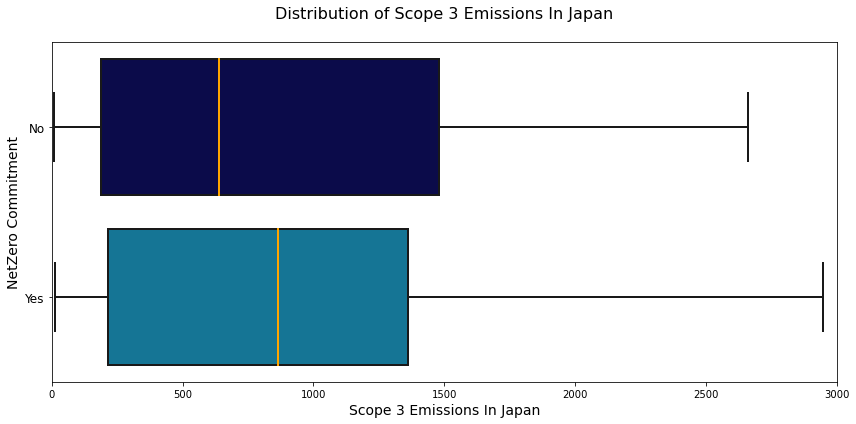

In [58]:
plot_stp(japan, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In Japan', 3000)

**Asia/Pacific**

In [40]:
asia_pacific = df[df['region']=='Asia/Pacific Ex Japan']


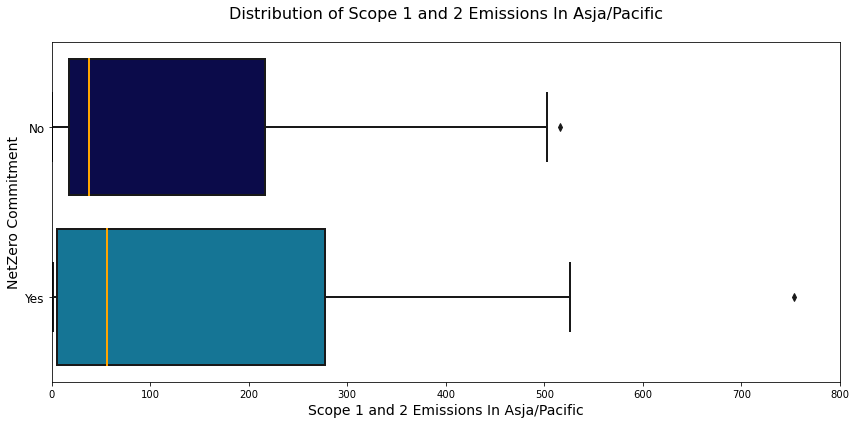

In [59]:
plot_stp(asia_pacific, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Asja/Pacific', 800)


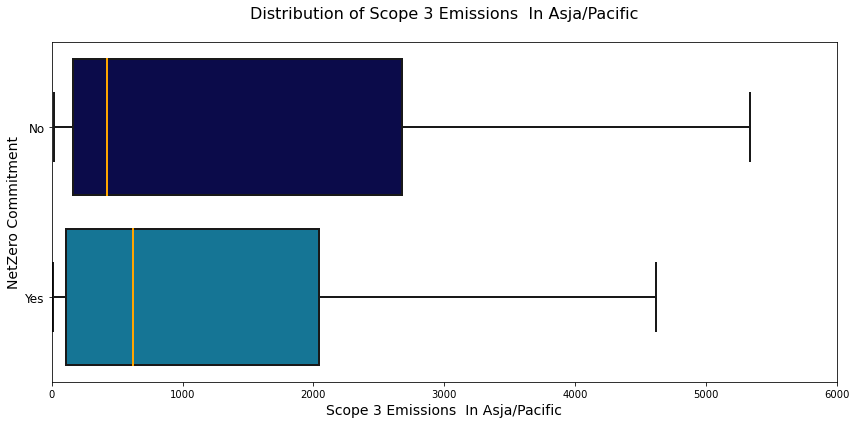

In [61]:
plot_stp(asia_pacific, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions  In Asja/Pacific', 6000)

**Africa/Mideast**

In [43]:
africa_mideast = df[df['region']=='Africa/Mideast']

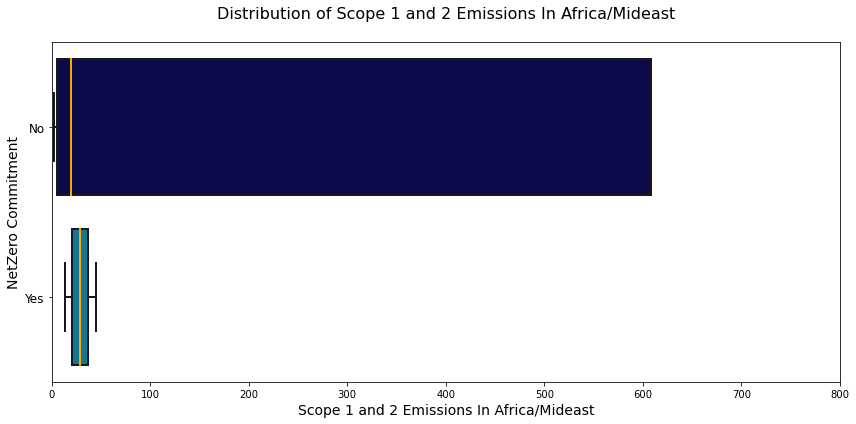

In [63]:
plot_stp(africa_mideast, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Africa/Mideast', 800)


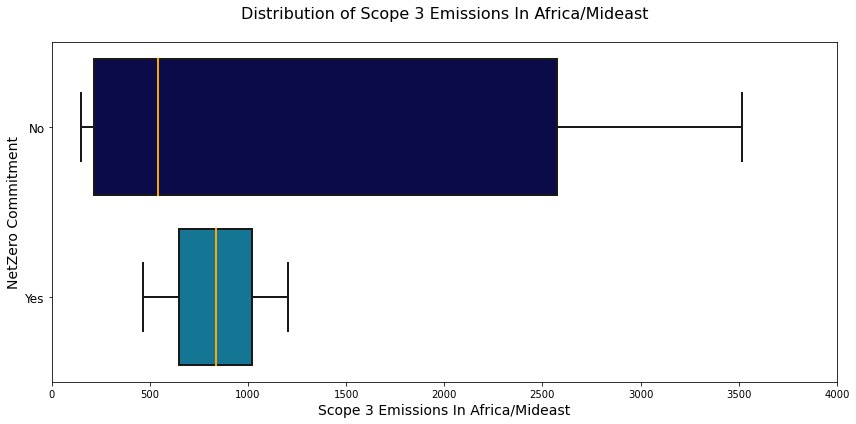

In [68]:
plot_stp(africa_mideast, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In Africa/Mideast', 4000)

**Latin America**

In [46]:
latin_america = df[df['region']=='Latin America']

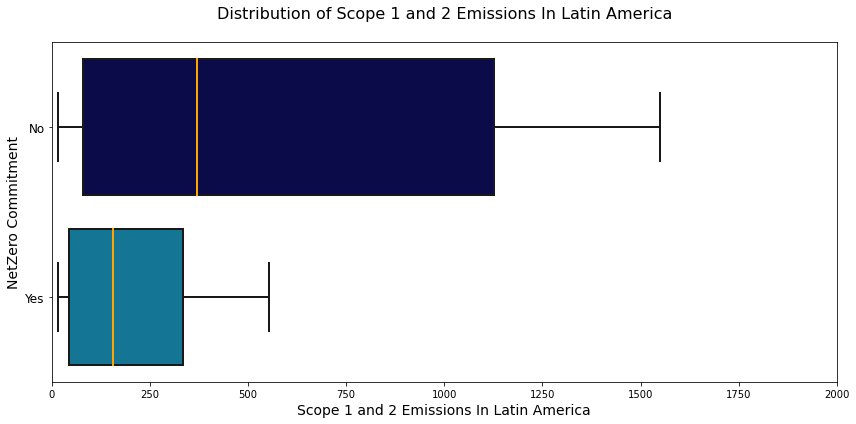

In [47]:
plot_stp(latin_america, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Latin America', 2000)

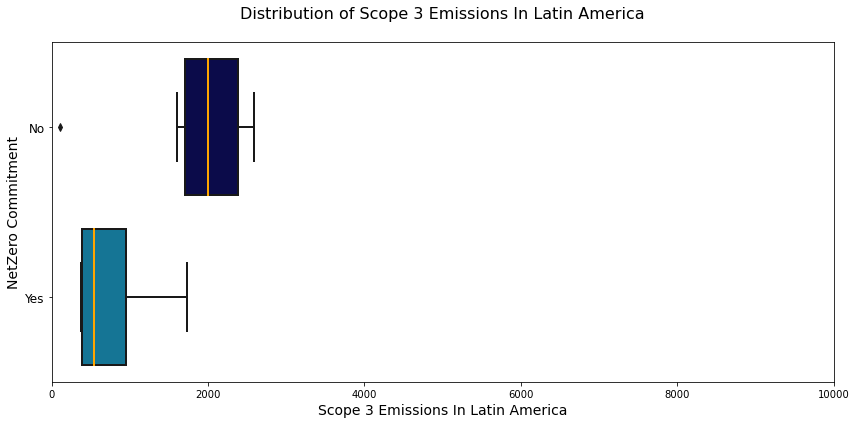

In [48]:
plot_stp(latin_america, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In Latin America', 10000)

In [49]:
#Number of Observations
pd.DataFrame(df.groupby(['region',
                         'net_zero_committed']).count()['fsym_id'])

fsym_id
region                net_zero_committed         
Africa/Mideast        No                        5
                      Yes                       2
Asia/Pacific Ex Japan No                       35
                      Yes                      22
Europe                No                      103
                      Yes                     104
Japan                 No                       61
                      Yes                      14
Latin America         No                        4
                      Yes                       7
North America         No                      111
                      Yes                      67

In [50]:
#just would like to exclude latin america to see how all emissions would look like
no_latin = df[df['region']!='Latin America']

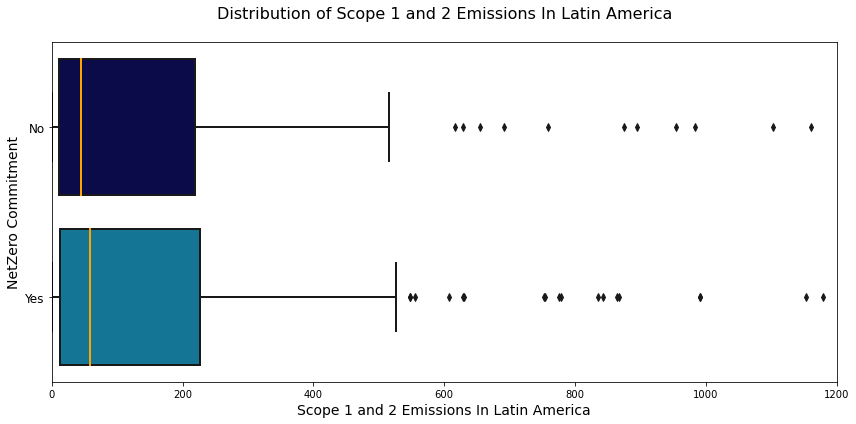

In [51]:
plot_stp(no_latin, 'net_zero_committed', 'scope1_2_emission', 
         'Scope 1 and 2 Emissions In Latin America', 1200)

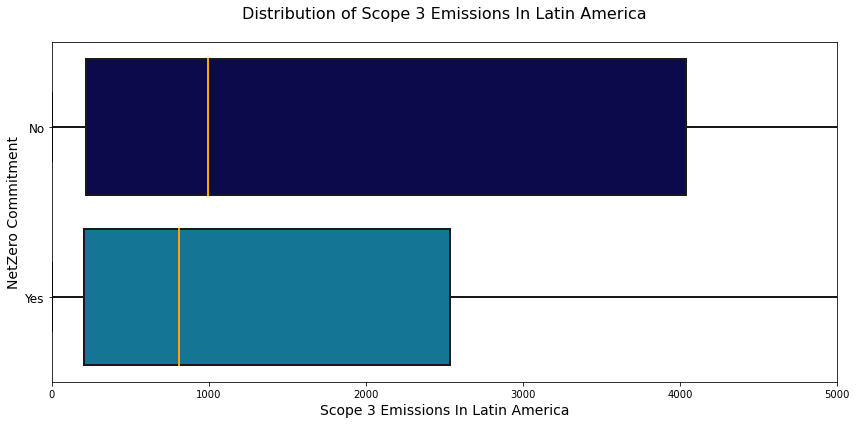

In [52]:
plot_stp(no_latin, 'net_zero_committed', 'scope_3_tonnes', 
         'Scope 3 Emissions In Latin America', 5000)

In [53]:
no_latin.groupby('net_zero_committed').describe()[['scope_3_tonnes', 'scope1_2_emission']].T

net_zero_committed                  No           Yes
scope_3_tonnes    count     315.000000    209.000000
                  mean     5204.864862   5471.414585
                  std     21225.076098  11956.767247
                  min         5.026250      1.584500
                  25%       208.275422    221.351503
                  50%       812.086563    997.159500
                  75%      2536.802138   4039.890439
                  max    231868.660500  90312.404750
scope1_2_emission count     315.000000    209.000000
                  mean      426.792921    784.612938
                  std      1681.587695   2878.662727
                  min         0.072000      0.074500
                  25%        13.145960     11.095500
                  50%        57.832250     44.452750
                  75%       226.060673    218.751250
                  max     23655.942500  29104.578500